# Проведение и анализ А/B-теста для интернет-магазина

Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки. Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты. 

**Цель исследования:** проведение A/B-теста и анализ его результатов (принятие решения по результатам теста).

**Исходные данные:**

* список гипотез;
* информация о заказах;
* информация о пользователях.

<a id="docum_data"></a>
**Описание данных:**

<u>**(1) Список гипотез - hypothesis.csv**</u> 🎯

* **`Hypothesis`** — краткое описание гипотезы;
* **`Reach`** — охват пользователей по 10-балльной шкале;
* **`Impact`** — влияние на пользователей по 10-балльной шкале;
* **`Confidence`** — уверенность в гипотезе по 10-балльной шкале;
* **`Efforts`** — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

<u>**(2) Информация о заказах - orders.csv**</u> 💰

* **`transactionId`** — идентификатор заказа;
* **`visitorId`** — идентификатор пользователя, совершившего заказ;
* **`date`** — дата, когда был совершён заказ;
* **`revenue`** — выручка заказа;
* **`group`** — группа A/B-теста, в которую попал заказ.

<u>**(3) Информация о пользователях - visitors.csv**</u> 👥

* **`date`** — дата;
* **`group`** — группа A/B-теста;
* **`visitors`** — количество пользователей в указанную дату в указанной группе A/B-теста

## Шаг 1. Загрузка даннных (первичный анализ данных)

**(1) Импортируем библиотеки Pandas, NumPy и Seaborn, подключаем модуль Pyplot из библиотеки Matplotlib и модуль scipy.stats из библиотеки SciPy, подключаем модули Datetime и Warnings, а также запускаем конвертер register_matplotlib_converters, который позволяет использовать типы Pandas в Matplotlib:**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import datetime as dt
import warnings
from pandas.plotting import register_matplotlib_converters

# конвертеры, которые позволяют использовать типы pandas в matplotlib  
register_matplotlib_converters()

**(2) Cбрасываем ограничение на число выводимых столбцов таблицы и ограничение на ширину столбцов:**

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

**(3) Добавим разделитель разрядов и оставим 2 знака после запятой для числовых значений (тип данных: float):**

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

<a id="hypo_first"></a>
### 1.1 Список гипотез (data_hypothesis)

**(1) Импортируем файл CSV-формата в датафрейм:**

In [4]:
try:
    data_hypothesis = pd.read_csv('other/documents/hypothesis.csv', sep=',')
except:
    data_hypothesis = pd.read_csv('/datasets/hypothesis.csv', sep=',')

**(2) Выведем первые строки таблицы:**

In [5]:
data_hypothesis.head()

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


**(3) Выведем сводную информацию по всему датасету:** <a id="visits_datainfo"></a>

In [6]:
data_hypothesis.info()

print('\nВсего строк:', data_hypothesis.shape[0])
print('Всего столбцов:', data_hypothesis.shape[1])

print('\nКоличество явных дубликатов:', data_hypothesis.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes

Всего строк: 9
Всего столбцов: 5

Количество явных дубликатов: 0


**(4) Выведем информацию по количеству пропущенных значений в каждом столбце:** <a id="visits_isna"></a>

In [7]:
print(data_hypothesis.isna().sum())

total_isna = []
for value in data_hypothesis.isna().sum():
    if value != 0:
        total_isna.append(value)

print('\nКоличество столбцов с пропущенными значениями:', len(total_isna))

Hypothesis    0
Reach         0
Impact        0
Confidence    0
Efforts       0
dtype: int64

Количество столбцов с пропущенными значениями: 0


**(5) Проверим список уникальных значений столбцов на наличие неявных дубликатов:**

**`Hypothesis`**

In [8]:
hypothesis_sorted = data_hypothesis.sort_values(by='Hypothesis', ascending=True)
hypothesis_sorted = hypothesis_sorted['Hypothesis'].unique()

for hypo in hypothesis_sorted:
    print(hypo)

Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов
Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
Запустить акцию, дающую скидку на товар в день рождения
Запустить собственную службу доставки, что сократит срок доставки заказов
Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар
Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей
Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию


**(6) Cгенерируем описательную статистику столбцов `Reach`, `Impact`, `Confidence`, `Efforts` для того, чтобы убедиться, что значения находятся в пределах 10-балльной шкалы:**

In [9]:
data_hypothesis.describe()

,Reach,Impact,Confidence,Efforts
count,9.00,9.00,9.00,9.00
mean,4.78,4.78,5.56,4.89
std,3.15,3.19,3.05,2.80
min,1.00,1.00,1.00,1.00
25%,3.00,3.00,3.00,3.00
50%,3.00,3.00,7.00,5.00
75%,8.00,7.00,8.00,6.00
max,10.00,10.00,9.00,10.00


<a id="orders_first"></a>
### 1.2 Информация о заказах (data_orders)

**(1) Импортируем файл CSV-формата в датафрейм:**

In [10]:
try:
    data_orders = pd.read_csv('other/documents/orders.csv', sep=',')
except:
    data_orders = pd.read_csv('/datasets/orders.csv', sep=',')

**(2) Выведем первые строки таблицы:**

In [11]:
data_orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


**(3) Выведем сводную информацию по всему датасету:** <a id="visits_datainfo"></a>

In [12]:
data_orders.info()

print('\nВсего строк:', data_orders.shape[0])
print('Всего столбцов:', data_orders.shape[1])

print('\nКоличество явных дубликатов:', data_orders.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB

Всего строк: 1197
Всего столбцов: 5

Количество явных дубликатов: 0


**(4) Выведем информацию по количеству пропущенных значений в каждом столбце:** <a id="visits_isna"></a>

In [13]:
print(data_orders.isna().sum())

total_isna = []
for value in data_orders.isna().sum():
    if value != 0:
        total_isna.append(value)

print('\nКоличество столбцов с пропущенными значениями:', len(total_isna))

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

Количество столбцов с пропущенными значениями: 0


**(5) Cгенерируем описательную статистику для столбцов для проверки наличия аномальных значений (артефактов):**

**`revenue`**

In [14]:
data_orders['revenue'].describe()

count       1,197.00
mean        8,348.01
std        39,191.13
min            50.00
25%         1,220.00
50%         2,978.00
75%         8,290.00
max     1,294,500.00
Name: revenue, dtype: float64

In [15]:
data_orders['revenue'].sort_values(ascending=False).head(5)

425     1294500
1196     202740
858       93940
1136      92550
744       86620
Name: revenue, dtype: int64

In [16]:
data_orders['revenue'].sort_values(ascending=False).tail(5)

933     60
459     50
756     50
584     50
1091    50
Name: revenue, dtype: int64

**(6) Проверим уникальные значения столбца `group`:**

In [17]:
data_orders['group'].unique()

array(['B', 'A'], dtype=object)

**(7) Посчитаем общее количество пользователей в тесте и проверим корректность их распределения по группам:**

In [18]:
print('Всего пользователей в тесте:', data_orders['visitorId'].nunique())

group_a = data_orders[data_orders['group'] == 'A']['visitorId']
group_b = data_orders[data_orders['group'] == 'B']['visitorId']

same_users = data_orders.query('visitorId in @group_a & visitorId in @group_b')
print('Число пользователей, одновременно присутствующих в двух группах:', same_users['visitorId'].nunique())

Всего пользователей в тесте: 1031
Число пользователей, одновременно присутствующих в двух группах: 58


<a id="visitors_first"></a>
### 1.3 Информация о пользователях (data_visitors)

**(1) Импортируем файл CSV-формата в датафрейм:**

In [19]:
try:
    data_visitors = pd.read_csv('other/documents/visitors.csv', sep=',')
except:
    data_visitors = pd.read_csv('/datasets/visitors.csv', sep=',')

**(2) Выведем первые строки таблицы:**

In [20]:
data_visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


**(3) Выведем сводную информацию по всему датасету:** <a id="visits_datainfo"></a>

In [21]:
data_visitors.info()

print('\nВсего строк:', data_visitors.shape[0])
print('Всего столбцов:', data_visitors.shape[1])

print('\nКоличество явных дубликатов:', data_visitors.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB

Всего строк: 62
Всего столбцов: 3

Количество явных дубликатов: 0


**(4) Выведем информацию по количеству пропущенных значений в каждом столбце:** <a id="visits_isna"></a>

In [22]:
print(data_visitors.isna().sum())

total_isna = []
for value in data_visitors.isna().sum():
    if value != 0:
        total_isna.append(value)

print('\nКоличество столбцов с пропущенными значениями:', len(total_isna))

date        0
group       0
visitors    0
dtype: int64

Количество столбцов с пропущенными значениями: 0


**(5) Проверим уникальные значения столбца `group`:**

In [23]:
data_visitors['group'].unique()

array(['A', 'B'], dtype=object)

---
<a id="first_res_data"></a>
### 📌 <u>**Результаты и выявленные проблемы первичного анализа данных**</u>

**[(1) Список гипотез (data_hypothesis)](#hypo_first)**

1. Датафрейм состоит из **9 строк** и **5 столбцов** различных типов данных:

    * **int** (целые числа) - 4 столбца;
    * **object** (текстовые или смешанные числовые и нечисловые значения) - 1 столбец;

2. Названия всех столбцов **содержат символы верхнего регистра**. Необходимо переименовать столбцы в соответствии со стилем "змеиного регистра".  

3. **Столбцов с пропущенными значеняими НЕ выявлено**;

4. **Типы данных соответствуют описанию столбцов из [документации](#docum_data)**;

5. **Явных дубликатов НЕ выявлено**;

6. **Неявных дубликатов НЕ выявлено**;

7. **Аномальные значения (артефакты) отсутствуют**;

8. Значения столбцов **`Reach`**, **`Impact`**, **`Confidence`**, **`Efforts`** **находятся в пределах 10-балльной шкалы**, как сказано в [документации](#docum_data).

In [24]:
# зафиксируем размер датасета до начала предобработки

size_hypothesis = data_hypothesis.shape[0]
size_hypothesis

9

---
**[(2) Информация о заказах (data_orders)](#orders_first)**

1. Датафрейм состоит из **1 197 строк** и **5 столбцов** различных типов данных:

    * **int** (целые числа) - 3 столбца;
    * **object** (текстовые или смешанные числовые и нечисловые значения) - 2 столбца;

2. Названия столбцов **`transactionId`** и **`visitorId`** **содержат символы верхнего регистра**. Необходимо переименовать столбцы в соответствии со стилем "змеиного регистра".  

3. **Столбцов с пропущенными значеняими НЕ выявлено**;

4. Наблюдается **несоответствие типа данных столбцов описанию из [документации](#docum_data)**:

    *  **`date`** - текущий тип данных **object** (текстовые или смешанные числовые и нечисловые значения) необходимо заменить на **datetime** (дата и время);

5. **Явных дубликатов НЕ выявлено**;

6. **Неявных дубликатов НЕ выявлено**;

7. В столбце **`revenue`** **присутствуют аномальные значения**. Более детально данное наблюдение будт разобрано на шаге анализа A/B-теста;

8. Обнаружено **58 пользователей, которые одновременно присутствуют в двух группах A и B**. В целях повышения корректности проведения A/B-теста принято решение исключить данных пользователей их анализа.

In [25]:
# зафиксируем размер датасета до начала предобработки

size_orders = data_orders.shape[0]
size_orders

1197

---
**[(3) Информация о пользователях (data_visitors)](#visitors_first)**

1. Датафрейм состоит из **62 строки** и **3 столбца** различных типов данных:

    * **int** (целые числа) - 1 столбец;
    * **object** (текстовые или смешанные числовые и нечисловые значения) - 2 столбца;

2. **Названия столбцов соответствуют стилю "змеиного регистра"**;

3. **Столбцов с пропущенными значеняими НЕ выявлено**;

4. Наблюдается **несоответствие типа данных столбцов описанию из [документации](#docum_data)**:

    *  **`date`** - текущий тип данных **object** (текстовые или смешанные числовые и нечисловые значения) необходимо заменить на **datetime** (дата и время);

5. **Явных дубликатов НЕ выявлено**;

6. **Неявных дубликатов НЕ выявлено**;

7. **Аномальные значения (артефакты) отсутствуют**.

In [26]:
# зафиксируем размер датасета до начала предобработки

size_visitors = data_visitors.shape[0]
size_visitors

62

## Шаг 2. Предобработка данных

<a id="hypo_pre"></a>
### 1.1 Список гипотез (data_hypothesis)

**(1) Приведём названия столбцов к "змеиному (нижнему) регистру":**

In [27]:
data_hypothesis.columns = data_hypothesis.columns.str.lower()
data_hypothesis.columns

Index(['hypothesis', 'reach', 'impact', 'confidence', 'efforts'], dtype='object')

**(2) Выведем обновлённую сводную информацию по всему датасету:**

In [28]:
data_hypothesis.info()

print('\nВсего строк:', data_hypothesis.shape[0])
print('Всего столбцов:', data_hypothesis.shape[1])

print('\nКоличество явных дубликатов:', data_hypothesis.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes

Всего строк: 9
Всего столбцов: 5

Количество явных дубликатов: 0


In [29]:
print(data_hypothesis.isna().sum())

total_isna = []
for value in data_hypothesis.isna().sum():
    if value != 0:
        total_isna.append(value)

print('\nКоличество столбцов с пропущенными значениями:', len(total_isna))

hypothesis    0
reach         0
impact        0
confidence    0
efforts       0
dtype: int64

Количество столбцов с пропущенными значениями: 0


**(3) Выведем первые строки обновлённого датафрейма:**

In [30]:
data_hypothesis.head()

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


<a id="orders_pre"></a>
### 1.2 Информация о заказах (data_orders)

**(1) Приведём названия столбцов `transactionId` и `visitorId` к "змеиному (нижнему) регистру":**

In [31]:
data_orders = data_orders.rename(
    columns={'transactionId': 'transaction_id',
             'visitorId': 'visitor_id'}
)

**(2) Исключим из анализа 58 пользователей, которые одновременно присутствуют в двух группах A и B:**

In [32]:
group_a = data_orders[data_orders['group'] == 'A']['visitor_id']
group_b = data_orders[data_orders['group'] == 'B']['visitor_id']

same_users1 = data_orders.query('visitor_id in @group_a & visitor_id in @group_b')

data_orders = data_orders.query('visitor_id not in @same_users1["visitor_id"]').reset_index(drop=True)

Проверим полученный результат:

In [33]:
group_a = data_orders[data_orders['group'] == 'A']['visitor_id']
group_b = data_orders[data_orders['group'] == 'B']['visitor_id']

same_users2 = data_orders.query('visitor_id in @group_a & visitor_id in @group_b')

print('Всего пользователей в тесте осталось:', data_orders['visitor_id'].nunique())
print('Число пользователей, одновременно присутствующих в двух группах:', same_users2['visitor_id'].nunique())

Всего пользователей в тесте осталось: 973
Число пользователей, одновременно присутствующих в двух группах: 0


**(3) Изменим тип данных *object* (текстовые или смешанные числовые и нечисловые значения) на *datetime* (дата и время) в столбце `date`:**

In [34]:
data_orders['date'] = pd.to_datetime(data_orders['date'])

Теперь можно проверить период данных:

In [35]:
print('Датафрейм содержит данные с', data_orders['date'].min(), 'по', data_orders['date'].max())

Датафрейм содержит данные с 2019-08-01 00:00:00 по 2019-08-31 00:00:00


**`Датафрейм содержит данные с 1 августа 2019 года по 31 августа 2019 года`**

**(4) Выведем обновлённую сводную информацию по всему датасету:**

In [36]:
data_orders.info()

print('\nВсего строк:', data_orders.shape[0])
print('Всего столбцов:', data_orders.shape[1])

print('\nКоличество явных дубликатов:', data_orders.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1016 entries, 0 to 1015
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1016 non-null   int64         
 1   visitor_id      1016 non-null   int64         
 2   date            1016 non-null   datetime64[ns]
 3   revenue         1016 non-null   int64         
 4   group           1016 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 39.8+ KB

Всего строк: 1016
Всего столбцов: 5

Количество явных дубликатов: 0


In [37]:
print(data_orders.isna().sum())

total_isna = []
for value in data_orders.isna().sum():
    if value != 0:
        total_isna.append(value)

print('\nКоличество столбцов с пропущенными значениями:', len(total_isna))

transaction_id    0
visitor_id        0
date              0
revenue           0
group             0
dtype: int64

Количество столбцов с пропущенными значениями: 0


**(5) Выведем первые строки обновлённого датафрейма:**

In [38]:
data_orders.head()

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,3797467345,1196621759,2019-08-15,9759,B
3,2282983706,2322279887,2019-08-15,2308,B
4,182168103,935554773,2019-08-15,2210,B


<a id="visitors_pre"></a>
### 1.3 Информация о пользователях (data_visitors)

**(1) Изменим тип данных *object* (текстовые или смешанные числовые и нечисловые значения) на *datetime* (дата и время) в столбце `date`:**

In [39]:
data_visitors['date'] = pd.to_datetime(data_visitors['date'])

Теперь можно проверить период данных:

In [40]:
print('Датафрейм содержит данные с', data_visitors['date'].min(), 'по', data_visitors['date'].max())

Датафрейм содержит данные с 2019-08-01 00:00:00 по 2019-08-31 00:00:00


**`Датафрейм содержит данные с 1 августа 2019 года по 31 августа 2019 года`**

**(2) Выведем обновлённую сводную информацию по всему датасету:**

In [41]:
data_visitors.info()

print('\nВсего строк:', data_visitors.shape[0])
print('Всего столбцов:', data_visitors.shape[1])

print('\nКоличество явных дубликатов:', data_visitors.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB

Всего строк: 62
Всего столбцов: 3

Количество явных дубликатов: 0


In [42]:
print(data_visitors.isna().sum())

total_isna = []
for value in data_visitors.isna().sum():
    if value != 0:
        total_isna.append(value)

print('\nКоличество столбцов с пропущенными значениями:', len(total_isna))

date        0
group       0
visitors    0
dtype: int64

Количество столбцов с пропущенными значениями: 0


**(3) Выведем первые строки обновлённого датафрейма:**

In [43]:
data_visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


---
<a id="preprocessing_res_data"></a>
### 📌 <u>**Результаты предобработки данных**</u>

**[(1) Список гипотез (data_hypothesis)](#hypo_pre)**

1. Все столбцы приведены к нижнему регистру. Новые названия столбцов:

    * **`hypothesis`** — краткое описание гипотезы;
    * **`reach`** — охват пользователей по 10-балльной шкале;
    * **`impact`** — влияние на пользователей по 10-балльной шкале;
    * **`confidence`** — уверенность в гипотезе по 10-балльной шкале;
    * **`efforts`** — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

2. После проведённых манпуляций датафрейм имеет следующие параметры: **9 строк** и **5 столбцов** различных типов данных:

    * **int** (целые числа) - 4 столбца;
    * **object** (текстовые или смешанные числовые и нечисловые значения) - 1 столбец.  

In [44]:
# проверка датасета data_hypothesis после предобработки данных

print(round(data_hypothesis.shape[0] / size_hypothesis, 2))
      
if round(data_hypothesis.shape[0] / size_hypothesis, 2) >= 0.8:
    print('\nДанные можно использовать для дальнейшего анализа')
else:
    print('\nДанные нельзя использовать для дальнейшего анализа')

1.0

Данные можно использовать для дальнейшего анализа


---
**[(2) Информация о заказах (data_orders)](#orders_pre)**

1. Все столбцы приведены к нижнему регистру. Новые названия столбцов:

    * **`transaction_id`** — идентификатор заказа;
    * **`visitor_id`** — идентификатор пользователя, совершившего заказ;
    * **`date`** — дата, когда был совершён заказ;
    * **`revenue`** — выручка заказа;
    * **`group`** — группа A/B-теста, в которую попал заказ.

2. Из анализа **исключены 58 пользователей, которые одновременно присутствовали в двух группах A и B**;

3. **Тип данных** в столбце **`date`** **изменён**. Теперь все столбцы соответствуют описанию из [документации](#docum_data), и их можно использовать для дальнейшего анализа;

4. После проведённых манпуляций датафрейм имеет следующие параметры: **1 016 строк** и **5 столбцов** различных типов данных:

    * **int** (целые числа) - 3 столбца;
    * **datetime** (дата и время) - 1 столбец;
    * **object** (текстовые или смешанные числовые и нечисловые значения) - 1 столбец.

5. Датафрейм содержит данные с **1 августа 2019 года** по **31 августа 2019 года**.

In [45]:
# проверка датасета data_orders после предобработки данных

print(round(data_orders.shape[0] / size_orders, 2))
      
if round(data_orders.shape[0] / size_orders, 2) >= 0.8:
    print('\nДанные можно использовать для дальнейшего анализа')
else:
    print('\nДанные нельзя использовать для дальнейшего анализа')

0.85

Данные можно использовать для дальнейшего анализа


---
**[(3) Информация о пользователях (data_visitors)](#visitors_pre)**

1. **Тип данных** в столбце **`date`** **изменён**. Теперь все столбцы соответствуют описанию из [документации](#docum_data), и их можно использовать для дальнейшего анализа;

2. После проведённых манпуляций датафрейм имеет следующие параметры: **62 строки** и **3 столбца** различных типов данных:

    * **int** (целые числа) - 1 столбец;
    * **datetime** (дата и время) - 1 столбец;
    * **object** (текстовые или смешанные числовые и нечисловые значения) - 1 столбец;

3. Датафрейм содержит данные с **1 августа 2019 года** по **31 августа 2019 года**.

In [46]:
# проверка датасета data_visitors после предобработки данных

print(round(data_visitors.shape[0] / size_visitors, 2))
      
if round(data_visitors.shape[0] / size_visitors, 2) >= 0.8:
    print('\nДанные можно использовать для дальнейшего анализа')
else:
    print('\nДанные нельзя использовать для дальнейшего анализа')

1.0

Данные можно использовать для дальнейшего анализа


## Шаг 3. Приоритизация гипотез

### 3.1 Применение фреймворка ICE

Фреймворк **ICE** состоит из трёх компонентов:

* **`I`mpact** — насколько сильно изменение повлияет на пользователей, их опыт и удовлетворение от продукта;
* **`C`onfidence** — насколько вы уверены, что это изменение повлияет на пользователей именно так; 
* **`E`fforts** — сколько стоит протестировать эту гипотезу.

---
**ICE SCORE = (IMPACT * CONFIDENCE) / EFFORTS**
___

**(1) Рассчитаем ICE SCORE для всех перечисленных и отсортируем их по убыванию приоритета:**

In [47]:
data_hypothesis['ice_score'] = (data_hypothesis['impact'] * data_hypothesis['confidence']) / data_hypothesis['efforts']
ice = data_hypothesis[['hypothesis', 'impact', 'confidence', 'efforts', 'ice_score']].sort_values(by='ice_score', ascending=False) 
ice

,hypothesis,impact,confidence,efforts,ice_score
8,"Запустить акцию, дающую скидку на товар в день рождения",9,9,5,16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",10,8,6,13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",7,8,5,11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",3,8,3,8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",3,7,3,7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",5,4,10,2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",2,2,3,1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1,1,1,1.00


**(2) Построим тепловую карту для более наглядного отображения показателей **`I`mpact**, **`C`onfidence**, **`E`fforts**:**

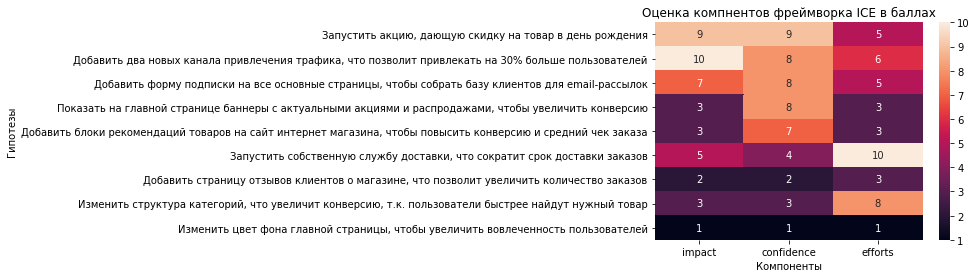

In [48]:
ice = ice[['hypothesis', 'impact', 'confidence', 'efforts']]
ice = ice.set_index('hypothesis')

sns.heatmap(ice, annot=True)

plt.title('Оценка компнентов фреймворка ICE в баллах')
plt.xlabel('Компоненты')
plt.ylabel('Гипотезы')

plt.show()

**(3) Построим столбчатую (горизонтальую) диаграмму рейтинга гипотез в соответствии с ICE SCORE:**

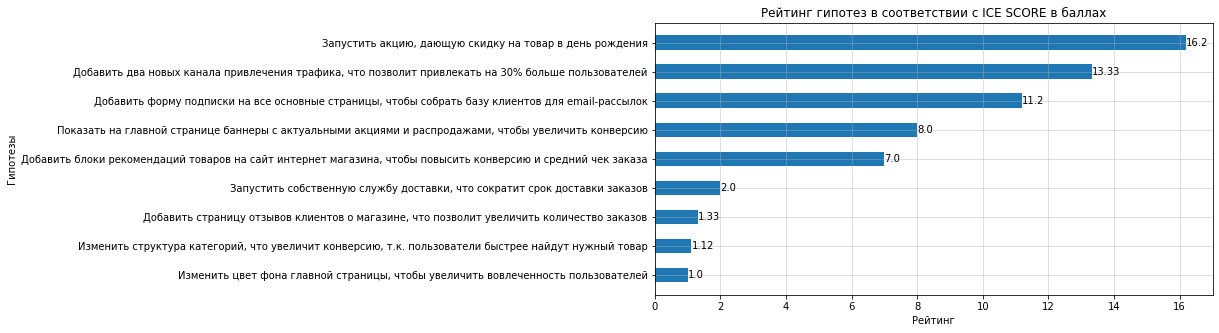

In [49]:
data_hypothesis_ice = data_hypothesis.sort_values(by='ice_score', ascending=True)
hypothesis = data_hypothesis_ice['hypothesis']
ice_score = round(data_hypothesis_ice['ice_score'], 2)

plt.figure(figsize=(10,5))
plt.barh(hypothesis, ice_score, height=0.5)

for i in range(len(ice_score)):
    plt.annotate(ice_score[i], xy=(ice_score[i],hypothesis[i]), ha='left', va='center')
   
plt.grid(alpha=0.5)
plt.title('Рейтинг гипотез в соответствии c ICE SCORE в баллах')
plt.xlabel("Рейтинг")
plt.ylabel("Гипотезы")

plt.show()

---
**<u>Вывод:</u>**

* **Наибольший рейтинг ICE SCORE** у гипотезы: <u>***№ 8 "Запустить акцию, дающую скидку на товар в день рождения"***</u> (**16,20 баллов**). 

    Запуск такой акции имеет практически наивысшие оценки по компонентам **Impact** и **Confidence** (по обои компонентам - **9 баллов**), при этом затраты оцениваются, как средние (оценка **Efforts** - **5 баллов**). Это позволяет нам утверждать, что воплощение данного предложения сможет простимулировать рост выручки и улучшит финансовое состояние компании. 

* **Наименьший рейтинг ICE SCORE** у гипотезы: <u>***№ 4 "Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей"***</u> (**1,00 балл**). 

    На изменение фона главной страницы требуется минимум затрат (оценка **Efforts** - **1 балл**), но такой ход с высокой степенью вероятности не принесёт желаемого результата: другое оформление никак не повлияет на желание пользователей делать больше покупок (оценка **Impact** и **Confidence** - **1 балл**).

Если смотреть на картину в целом, то потенциально рабочими можно назвать **5 гипотез** (согласно рейтингу **ICE SCORE**):

1. <u>***№ 8 "Запустить акцию, дающую скидку на товар в день рождения"***</u> (**16,20 баллов**)

2. <u>***№ 0 "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей"***</u> (**13,33 баллов**)

3. <u>***№ 7 "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"***</u> (**11,20 баллов**)

4. <u>***№ 6 "Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию"***</u> (**8,00 баллов**)

5. <u>***№ 2 "Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа"***</u> (**7,00 баллов**)

### 3.2 Применение фреймворка RICE

Фреймворк **RICE** состоит из четырёх компонентов:

* **`R`each** — скольких пользователей затронет изменение, которое вы хотите внести;
* **`I`mpact** — насколько сильно изменение повлияет на пользователей, их опыт и удовлетворение от продукта;
* **`C`onfidence** — насколько вы уверены, что это изменение повлияет на пользователей именно так; 
* **`E`fforts** — сколько стоит протестировать эту гипотезу.

---
**RICE SCORE = (REACH * IMPACT * CONFIDENCE) / EFFORTS**
___

**(1) Рассчитаем RICE SCORE для всех перечисленных гипотез и отсортируем их по убыванию приоритета:**

In [50]:
data_hypothesis['rice_score'] = (data_hypothesis['reach'] * data_hypothesis['impact'] * data_hypothesis['confidence']) / data_hypothesis['efforts']
rice = data_hypothesis.sort_values(by='rice_score', ascending=False) 
rice

,hypothesis,reach,impact,confidence,efforts,ice_score,rice_score
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.00
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.00
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.00
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.20
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.00
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.00


**(2) Построим тепловую карту для более наглядного отображения показателей **`R`each**, **`I`mpact**, **`C`onfidence**, **`E`fforts**:**

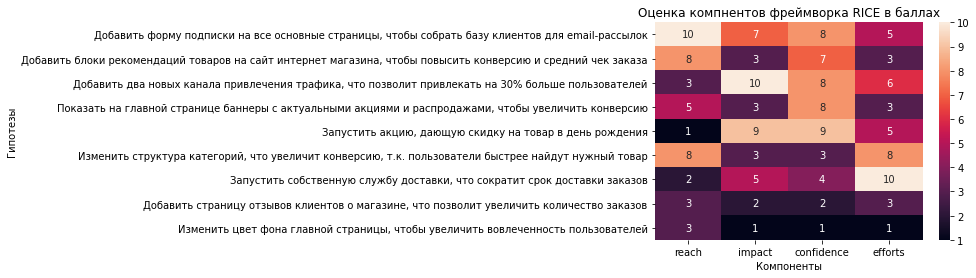

In [51]:
rice = rice[['hypothesis', 'reach', 'impact', 'confidence', 'efforts']]
rice = rice.set_index('hypothesis')

sns.heatmap(rice, annot=True)

plt.title('Оценка компнентов фреймворка RICE в баллах')
plt.xlabel('Компоненты')
plt.ylabel('Гипотезы')

plt.show()

**(3) Построим столбчатую (горизонтальую) диаграмму рейтинга гипотез в соответствии с RICE SCORE:**

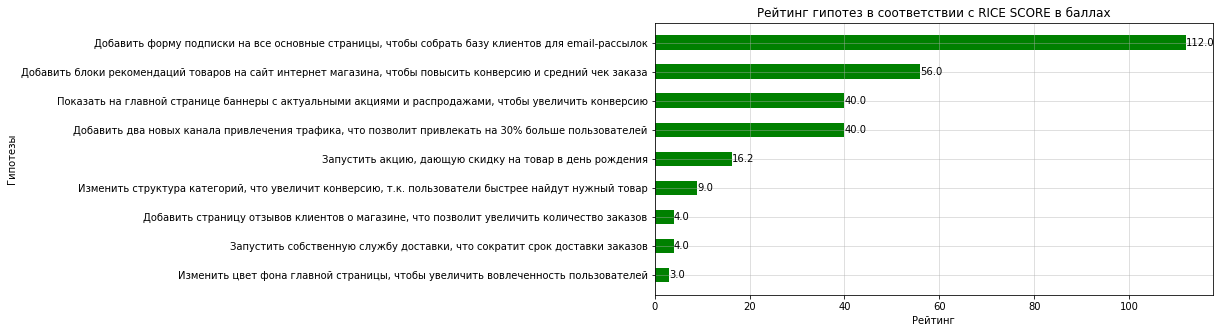

In [52]:
data_hypothesis_rice = data_hypothesis.sort_values(by='rice_score', ascending=True)
hypothesis = data_hypothesis_rice['hypothesis']
rice_score = round(data_hypothesis_rice['rice_score'], 2)

plt.figure(figsize=(10,5))
plt.barh(hypothesis, rice_score, height=0.5, color='green')

for i in range(len(rice_score)):
    plt.annotate(rice_score[i], xy=(rice_score[i],hypothesis[i]), ha='left', va='center')
   
plt.grid(alpha=0.5)
plt.title('Рейтинг гипотез в соответствии c RICE SCORE в баллах')
plt.xlabel("Рейтинг")
plt.ylabel("Гипотезы")

plt.show()

---
**<u>Вывод:</u>**

* **Наибольший рейтинг RICE SCORE** у гипотезы: <u>***№ 7 "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"***</u> (**112,00**)

    Гипотеза лидирует с большим отрывом благодаря наивысшей оценке **Reach** (**10 баллов**), высоким **Impact** и **Confidence** (**7 и 8 баллов** соответственно) и среднему **Efforts** (**5 баллов**). Добавление формы подписки на все основные странциы не является очень затратной задачой, но в итоге нам удаётся охватить абсолютно всех пользователей, которые посещают сайт интернет-магазина. При этом есть уверенность в том, что предпринятые действия с высокой степенью вероятности сработают и позволят дать нам желаемый результат, а именно увеличение выручки.

* **Наименьший рейтинг RICE SCORE** у гипотезы: <u>***№ 4 "Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей"***</u> (**3,00**)

    Как и в рейтинге **ICE SCORE** гипотеза занимает последнее место, оценка компонента **Reach** (**3 балла** (что является одним из самых нзхких показателей)) не изменила ситуацию.

Если смотреть на картину в целом, то потенциально рабочими можно назвать **4 гипотезы** (согласно рейтингу **RICE SCORE**):

1. <u>***№ 7 "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"***</u> (**112,00 баллов**)

2. <u>***№ 2 "Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа"***</u> (**56,00 баллов**)

3. <u>***№ 6 "Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию"***</u> (**40,00 баллов**)

4. <u>***№ 0 "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей"***</u> (**40,00 баллов**)

### 3.3 Сравнение приоритизации гипотез по ICE и RICE

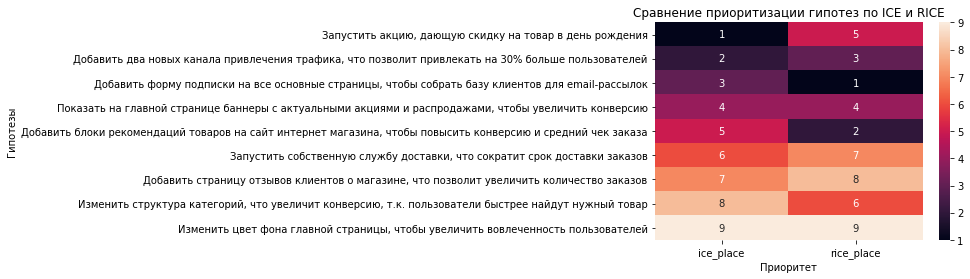

In [53]:
# приоритет гипотез после применения фреймворка ICE

ice_place = data_hypothesis[['hypothesis', 'impact', 'confidence', 'efforts', 'ice_score']].sort_values(by='ice_score', ascending=False) 
ice_place['ice_place'] = np.arange(len(ice_place))[::1]+1
ice_place = ice_place[['hypothesis', 'ice_place']]
ice_place = ice_place.set_index('hypothesis')

# приоритет гипотез после применения фреймворка RICE

rice_place = data_hypothesis.sort_values(by='rice_score', ascending=False) 
rice_place['rice_place'] = np.arange(len(rice_place))[::1]+1
rice_place = rice_place[['hypothesis', 'rice_place']]
rice_place = rice_place.set_index('hypothesis')

# сравнение приоритетов гипотез после применения фреймворков ICE и RICE

ice_rice_joined = ice_place.join(rice_place)

# тепловая карта приоритетов гипотез

sns.heatmap(ice_rice_joined, annot=True)

plt.title('Сравнение приоритизации гипотез по ICE и RICE')
plt.xlabel('Приоритет')
plt.ylabel('Гипотезы')

plt.show()

---
**<u>Вывод:</u>**

Приоритет гипотез по **ICE** и **RICE** различается. Это объясняется наличием дополнительного компонента **Reach** в фреймворке **RICE**. Чем больше пользователей затронет изменение, которое компания собирается внести, тем больше будет оценка **Reach**. 

Первая по приоритету гипотеза из рейтинга **ICE SCORE** (<u>***№ 8 "Запустить акцию, дающую скидку на товар в день рождения"***</u>)  занимает лишь 5-е место в рейтинге **RICE SCORE** из-за самой низкой оценки **Reach** (**1 балл**), в то время как занимавшая 3-е место гипотеза из рейтинга **ICE SCORE** (<u>***№ 7 "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"***</u>) вырвалась в лидеры с внушительным отрывом после применения фреймворка **RICE**, поскольку оценка **Reach** составила **10 баллов**.

В топ-3 и в том и в другом рейтинге вошли лишь 2 гипотезы:

* <u>***№ 7 "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"***</u> (**ICE SCORE** - 3 место, **RICE SCORE** - 1 место)
* <u>***№ 0 "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей"***</u> (**ICE SCORE** - 2 место, **RICE SCORE** - 3 место)

---
<a id="hypo_results"></a>
### 📌 <u>**Результаты**</u>

Для приоритизации гипотез были применены фреймворки **ICE** и **RICE**.

**(1) Результат применения фреймворка ICE:**

* **Наибольший рейтинг ICE SCORE** у гипотезы: <u>***№ 8 "Запустить акцию, дающую скидку на товар в день рождения"***</u> (**16,20 баллов**). 

    Запуск такой акции имеет практически наивысшие оценки по компонентам **Impact** и **Confidence** (по обои компонентам - **9 баллов**), при этом затраты оцениваются, как средние (оценка **Efforts** - **5 баллов**). Это позволяет нам утверждать, что воплощение данного предложения сможет простимулировать рост выручки и улучшит финансовое состояние компании. 

* **Наименьший рейтинг ICE SCORE** у гипотезы: <u>***№ 4 "Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей"***</u> (**1,00 балл**). 

    На изменение фона главной страницы требуется минимум затрат (оценка **Efforts** - **1 балл**), но такой ход с высокой степенью вероятности не принесёт желаемого результата: другое оформление никак не повлияет на желание пользователей делать больше покупок (оценка **Impact** и **Confidence** - **1 балл**).

---
**(2) Результат применения фреймворка RICE:**

* **Наибольший рейтинг RICE SCORE** у гипотезы: <u>***№ 7 "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"***</u> (**112,00**)

    Гипотеза лидирует с большим отрывом благодаря наивысшей оценке **Reach** (**10 баллов**), высоким **Impact** и **Confidence** (**7 и 8 баллов** соответственно) и среднему **Efforts** (**5 баллов**). Добавление формы подписки на все основные странциы не является очень затратной задачой, но в итоге нам удаётся охватить абсолютно всех пользователей, которые посещают сайт интернет-магазина. При этом есть уверенность в том, что предпринятые действия с высокой степенью вероятности сработают и позволят дать нам желаемый результат, а именно увеличение выручки.

* **Наименьший рейтинг RICE SCORE** у гипотезы: <u>***№ 4 "Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей"***</u> (**3,00**)

    Как и в рейтинге **ICE SCORE** гипотеза занимает последнее место, оценка компонента **Reach** (**3 балла** (что является одним из самых нзхких показателей)) не изменила ситуацию.

---
**(3) Результат сравнения приоритизации гипотез по ICE и RICE:**

Приоритет гипотез по **ICE** и **RICE** различается. Это объясняется наличием дополнительного компонента **Reach** в фреймворке **RICE**. Чем больше пользователей затронет изменение, которое компания собирается внести, тем больше будет оценка **Reach**. 

Первая по приоритету гипотеза из рейтинга **ICE SCORE** (<u>***№ 8 "Запустить акцию, дающую скидку на товар в день рождения"***</u>)  занимает лишь 5-е место в рейтинге **RICE SCORE** из-за самой низкой оценки **Reach** (**1 балл**), в то время как занимавшая 3-е место гипотеза из рейтинга **ICE SCORE** (<u>***№ 7 "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"***</u>) вырвалась в лидеры с внушительным отрывом после применения фреймворка **RICE**, поскольку оценка **Reach** составила **10 баллов**.

В топ-3 и в том и в другом рейтинге вошли лишь 2 гипотезы:

* <u>***№ 7 "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"***</u> (**ICE SCORE** - 3 место, **RICE SCORE** - 1 место)
* <u>***№ 0 "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей"***</u> (**ICE SCORE** - 2 место, **RICE SCORE** - 3 место)

---
Для проведения A/B-теста приянто решение использовать гипотезу <u>***№ 7 "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"***</u>.

## Шаг 4. Анализ A/B-теста

### 4.1 График кумулятивной выручки по группам

Чтобы построить графики, нужно собрать кумулятивные данные.

In [54]:
# создаем массив уникальных пар значений дат и групп теста

datesGroups = data_orders[['date','group']].drop_duplicates()

In [55]:
# получаем агрегированные кумулятивные по дням данные о заказах 

ordersAggregated = datesGroups.apply(
    lambda x: data_orders[
        np.logical_and(
            data_orders['date'] <= x['date'], data_orders['group'] == x['group']
        )
    ].agg({
            'date': 'max',
            'group': 'max',
            'transaction_id': 'nunique',
            'visitor_id': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

ordersAggregated.head()

,date,group,transaction_id,visitor_id,revenue
45,2019-08-01,A,23,19,142779
54,2019-08-01,B,17,17,59758
149,2019-08-02,A,42,36,234381
147,2019-08-02,B,40,39,221801
245,2019-08-03,A,66,60,346854


In [56]:
# получаем агрегированные кумулятивные по дням данные о посетителях

visitorsAggregated = datesGroups.apply(
    lambda x: data_visitors[
        np.logical_and(
            data_visitors['date'] <= x['date'], data_visitors['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max', 
            'group': 'max', 
            'visitors': 'sum'
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

visitorsAggregated.head()

,date,group,visitors
45,2019-08-01,A,719
54,2019-08-01,B,713
149,2019-08-02,A,1338
147,2019-08-02,B,1294
245,2019-08-03,A,1845


In [57]:
# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия

cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

cumulativeData.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845


Построим график кумулятивной выручки по группам:

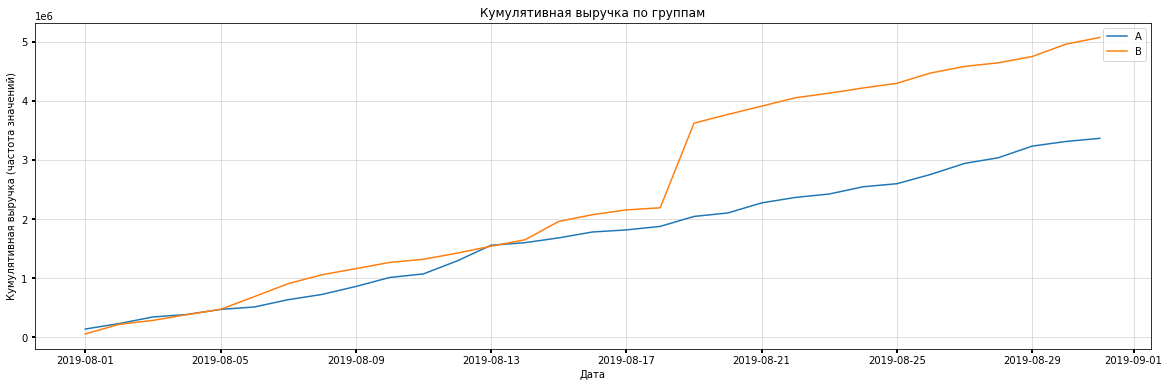

In [58]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А

cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B

cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# строим график выручки группы А

plt.figure(figsize=(20,6))

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# строим график выручки группы B

plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.tick_params(width = 2)
plt.grid(alpha=0.5)
plt.xlabel('Дата')
plt.ylabel('Кумулятивная выручка (частота значений)') 
plt.title('Кумулятивная выручка по группам')
plt.legend()

plt.show()

---
**<u>Вывод:</u>** 

* в течение всего рассматрваемого периода по двум группам **выручка увеличивается равномерно за исключением 19 августа 2019 года**, когда по **группе B** произошёл резкий рост, который мог возникнуть по причине многократного увеличения заказов, либо по причине появления очень дорогих заказов в выборке;
* подавляющую чать времени **группа B** является лидером;
* в период с **1 августа 2019 года** по **5 августа 2019 года**, а также **13 августа 2019 года** выручка в обеих группах практически одинаковая.

### 4.2 График кумулятивного среднего чека по группам

Построим графики среднего чека по группам — разделим кумулятивную выручку на кумулятивное число заказов:

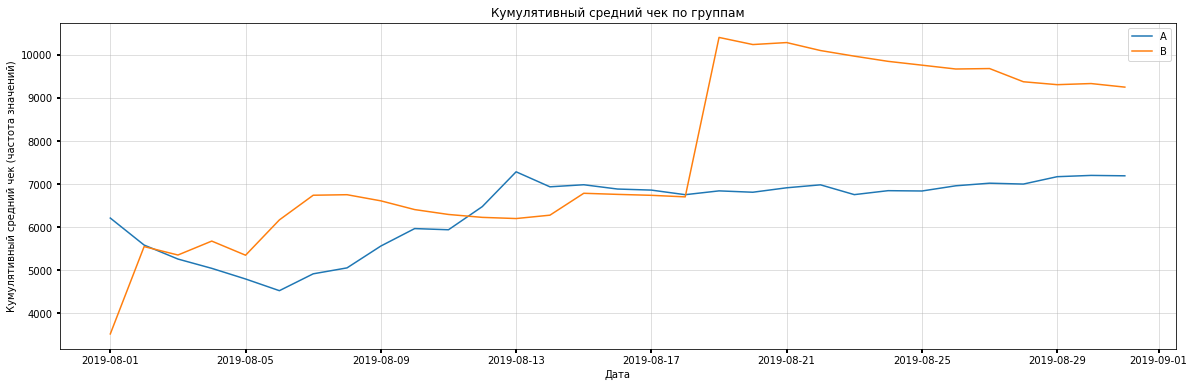

In [59]:
# строим график среднего чека группы А

plt.figure(figsize=(20,6))

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')

# строим график среднего чека группы B

plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

plt.tick_params(width = 2)
plt.grid(alpha=0.5)
plt.xlabel('Дата')
plt.ylabel('Кумулятивный средний чек (частота значений)') 
plt.title('Кумулятивный средний чек по группам')
plt.legend()

plt.show()

---
**<u>Вывод:</u>** 

* поведение графиков обеих групп можно разделить на два отрезка: 

    * **группа A**: нестабильное - с **1 августа 2019 года** по **14 августа 2019 года**, стабильное - с **15 августа 2019 года** и до окончания рассматриваемого периода;
    * **группа B**: нестабильное - с **1 августа 2019 года** по **18 августа 2019 года**, стабильное - с **19 августа 2019 года** и до окончания рассматриваемого периода;

* у **группы B** зафикисровано 2 резких скачка - **2 августа 2019 года** и **18 августа 2019 года**, т.е. в выборку возможно попали крупные заказы (2-ой скачок более ярко выраженный) => необходимо больше данных;     
* в конце рассматриваемого периода у **группы A** наблюдается тенденция к росту, у **группы B** - к снижению;
* большую часть времени **у группы B** кумулятивный средний чек выше.

### 4.3 График относительного изменения кумулятивного среднего чека группы B к группе A

Построим график относительного различия для среднего чека. Добавим горизонтальную ось методом **axhline()**:

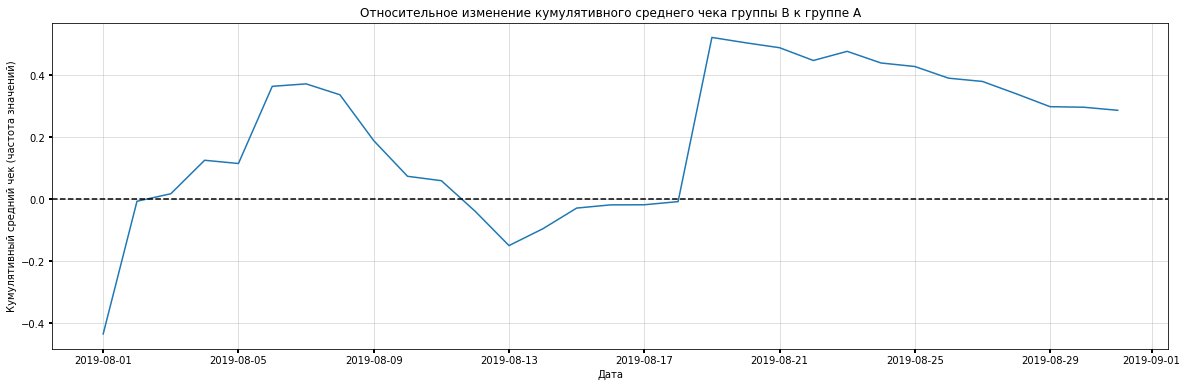

In [60]:
# собираем данные в одном датафрейме

mergedCumulativeRevenue = cumulativeRevenueA.merge(
    cumulativeRevenueB, 
    left_on='date', 
    right_on='date', 
    how='left', 
    suffixes=['A', 'B']
)

# cтроим отношение средних чеков

plt.figure(figsize=(20,6))

plt.plot(mergedCumulativeRevenue['date'], 
         (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1
)

# добавляем ось X

plt.axhline(y=0, 
            color='black', 
            linestyle='--')

plt.tick_params(width = 2)
plt.grid(alpha=0.5)
plt.xlabel('Дата')
plt.ylabel('Кумулятивный средний чек (частота значений)') 
plt.title('Относительное изменение кумулятивного среднего чека группы B к группе A')

plt.show()

---
**<u>Вывод:</u>** 

* график различия между группами в нескольких точках  резко «скачет» => это является признаком крупных заказов и выбросов;
* в период с **12 августа 2019 года** по **18 августа 2019 года** **группа A** демонстрирует наилучший результат;
* после крупного выброса **19 августа 2019** года график демонстрирует стабильное поведение;
* большую часть времени показатели **группы B** выглядят более привлекательно относительно  показателей **группы A**.

### 4.4 График кумулятивного среднего количества заказов на посетителя по группам

Проанализируем график кумулятивного среднего количества заказов на посетителя по группам:

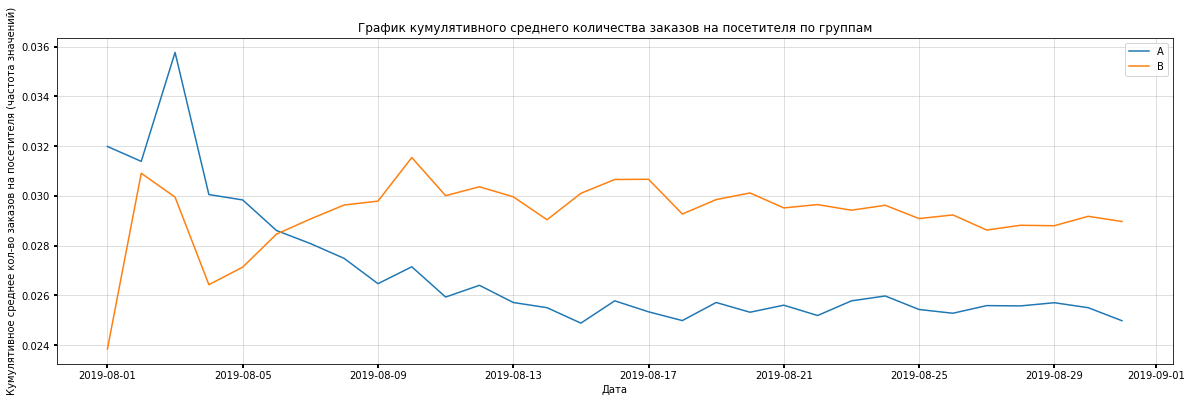

In [61]:
# считаем среднее количество заказов на посетителя

cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A

cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B

cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики

plt.figure(figsize=(20,6))

plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')

plt.tick_params(width = 2)
plt.grid(alpha=0.5)
plt.xlabel('Дата')
plt.ylabel('Кумулятивное среднее кол-во заказов на посетителя (частота значений)') 
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.legend()

plt.show()

---
**<u>Вывод:</u>** 

* за рассматриваемый период поведение графиков обеих групп можно разделить на три временных отрезка: 
    * сильное колебание -  с **1 августа 2019 года** по **6 августа 2019 года**;
    * среднее колебание - с **7 августа 2019 года** по **18 августа 2019 года**;
    * стабилизация - с **19 августа 2019 года** и до окночания теста;

* подавляющую часть времени показатели **группы B** выглядят более привлекательно относительно  показателей **группы A**;
* графики НЕ являются симметричными.

### 4.5 График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

Построим график изменения кумулятивного среднего количества заказов на посетителя группы B к группе A:

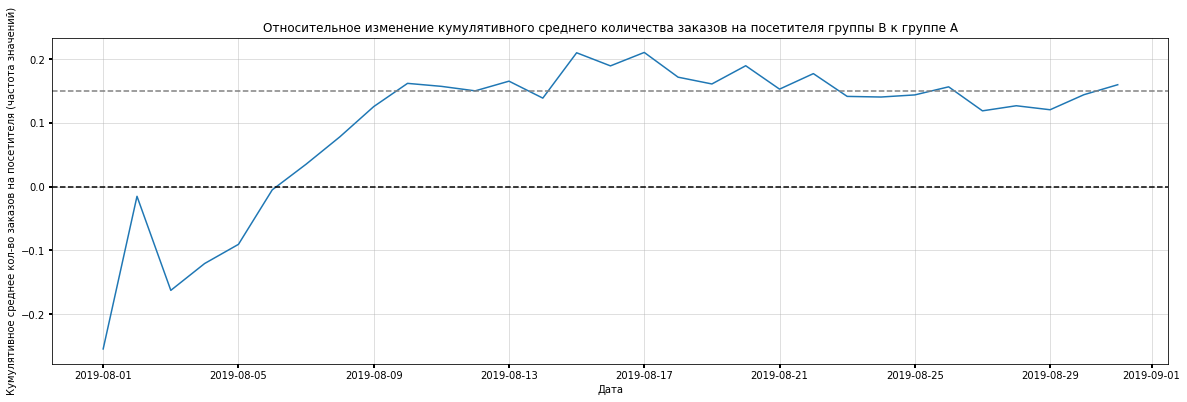

In [62]:
# собираем данные в одном датафрейме

mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(
    cumulativeDataB[['date','conversion']], 
    left_on='date', 
    right_on='date', 
    how='left', 
    suffixes=['A', 'B']
)

# строим графики

plt.figure(figsize=(20,6))

plt.plot(mergedCumulativeConversions['date'], 
         mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1 
)

plt.axhline(y=0, 
            color='black', 
            linestyle='--'
)
plt.axhline(y=0.15, 
            color='grey', 
            linestyle='--'
)

plt.tick_params(width = 2)
plt.grid(alpha=0.5)
plt.xlabel('Дата')
plt.ylabel('Кумулятивное среднее кол-во заказов на посетителя (частота значений)') 
plt.title('Относительное изменение кумулятивного среднего количества заказов на посетителя группы B к группе A')

plt.show()

---
**<u>Вывод:</u>** 

* в самом начале теста группа A выигрывала у группы B, но затем с **7 августа 2019 года** упустила преимущество и далее не вырывалась в лидеры;
* с **16 августа 2019 года** график начинает стремиться к стабилизация, но до конца периода все равно наблюдаются незначительные колебания на уровне примерно **15-17%** в пользу **группы B**.

### 4.6 Точечный график количества заказов по пользователям

Подсчитаем количество заказов по пользователям и выведем топ-10 пользователей с наибольшим количеством заказов:

In [63]:
ordersByUsers = (
    data_orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)

ordersByUsers.columns = ['user_id', 'orders']

ordersByUsers.sort_values(by='orders', ascending=False).head(10) 

,user_id,orders
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3
138,611059232,3
632,2742574263,3
157,678354126,2
323,1404560065,2
452,1985475298,2


Построим точечный график количества заказов по пользователям:

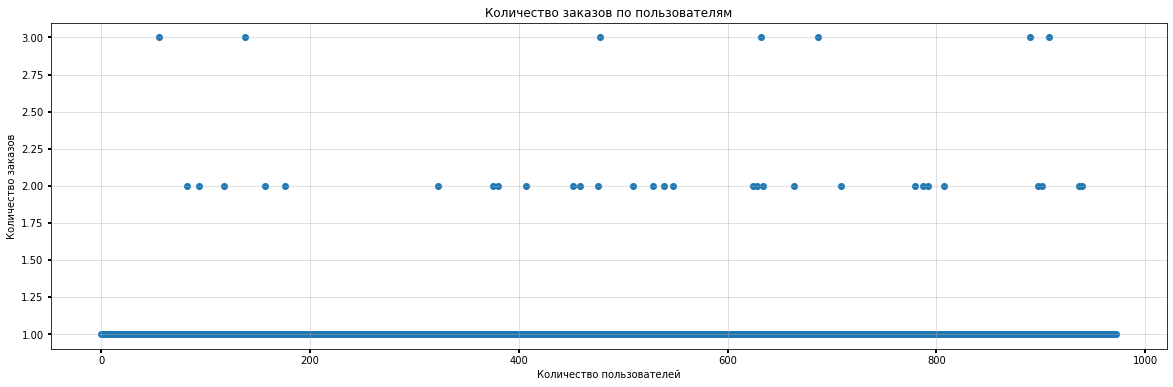

In [64]:
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.figure(figsize=(20,6))

plt.scatter(x_values, ordersByUsers['orders'])

plt.tick_params(width = 2)
plt.grid(alpha=0.5)
plt.xlabel('Количество пользователей')
plt.ylabel('Количество заказов') 
plt.title('Количество заказов по пользователям')

plt.show()

---
**<u>Вывод:</u>** 

* в основном пользователи совершали по **1-му заказу**;
* присутствуют пользователи, которые делали по **2 и 3 заказа**, но и их точная доля не ясна, именно поэтому нет ясности в том, считать их аномалиями или нет. 

### 4.7 Расчёт 95-ого и 99-ого перцентилей количества заказов на пользователя

Посчитаем выборочные перцентили (95-й и 99-й перцентили) количества заказов на одного пользователя:

In [65]:
print(np.percentile(ordersByUsers['orders'], [95, 99]))

[1. 2.]


---
**<u>Вывод:</u>** не более **5 %** пользователей оформили больше чем **1 заказ** и не более **1%** пользователей - больше **2-х заказов**. Принимаем **1 заказ** на одного пользователя за верхнюю границу количества заказов и отсеиваем аномальных пользователей.

### 4.8 Точечный график стоимостей заказов

Отобразим топ-10 транзакций по стоимости заказов:

In [66]:
revenue_info = data_orders[['transaction_id', 'revenue']]
revenue_info.sort_values(by='revenue', ascending=False).head(10)

,transaction_id,revenue
365,590470918,1294500
1015,3936777065,202740
971,666610489,92550
632,3668308183,86620
631,3603576309,67990
939,1348774318,66350
937,316924019,65710
811,1347999392,60450
802,2420050534,58550
109,3163614039,53904


Построим точечный график стоимостей заказов:

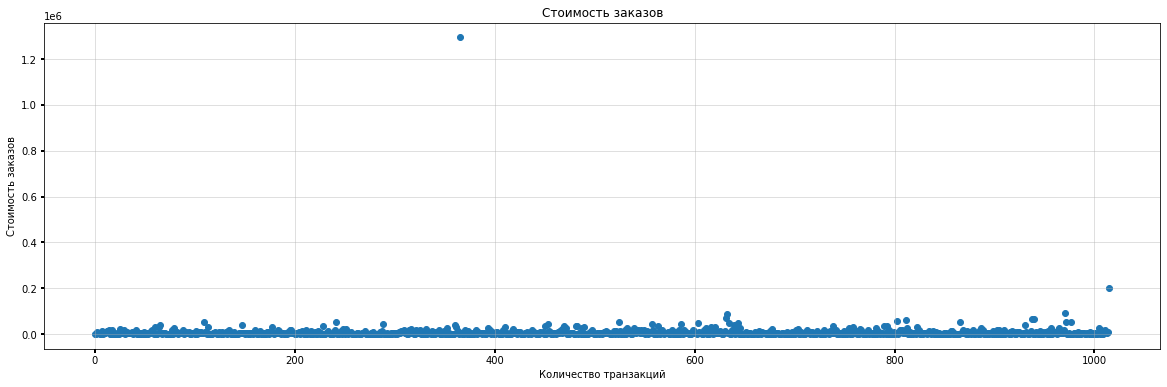

In [67]:
x_values = pd.Series(range(0,len(revenue_info)))

plt.figure(figsize=(20,6))

plt.scatter(x_values, revenue_info['revenue'])

plt.tick_params(width = 2)
plt.grid(alpha=0.5)
plt.xlabel('Количество транзакций')
plt.ylabel('Стоимость заказов') 
plt.title('Стоимость заказов')

plt.show()

---
**<u>Вывод:</u>** 

* в большинстве своём заказы на превышают **100 000 у.е.**;
* выявлено два аномальных заказа на сумму **1 294 500 у.е.** и **202 740 у.е.**

### 4.9 Расчёт 95-ого 99-ого перцентилей стоимости заказов

Посчитаем выборочные перцентили (95-й и 99-й перцентили) стоимости заказов:

In [68]:
print(np.percentile(revenue_info['revenue'], [95, 99]))

[26785. 53904.]


---
**<u>Вывод:</u>** не более **5 %** заказов превышают стоимость в **26 785 у.е.** и не более **1%** заказов превышают стоимость в **53 904 у.е.**. Устанавливаем верхнюю границу стоимости заказов по величине 95-го перцентиля (**26 785 у.е.**).

### 4.10 Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным

Посчитаем статистическую значимость различий в среднем числе заказов на пользователя между группами по «сырым» данным — без удаления аномальных пользователей.

**(1) Сформулируем гипотезы:**

---
**H_0:** Различий в среднем количестве заказов между группами нет.

**H_1:** Различия в среднем количестве заказов между группами есть.

---
**alpha = 0.05**

**(2) Подготовим данные:**

In [69]:
visitorsADaily = data_visitors[data_visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitors_per_date_a']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_per_date_a': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitors_cummulative_a']

visitorsBDaily = data_visitors[data_visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitors_per_date_b']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_per_date_b': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitors_cummulative_b']

ordersADaily = (
    data_orders[data_orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'orders_per_date_a', 'revenue_per_date_a']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'orders_per_date_a': 'sum', 'revenue_per_date_a': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])

ordersACummulative.columns = [
    'date',
    'orders_cummulative_a',
    'revenue_cummulative_a',
]

ordersBDaily = (
    data_orders[data_orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'orders_per_date_b', 'revenue_per_date_b']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'orders_per_date_b': 'sum', 'revenue_per_date_b': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])

ordersBCummulative.columns = [
    'date',
    'orders_cummulative_b',
    'revenue_cummulative_b',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

data.head(5)

,date,orders_per_date_a,revenue_per_date_a,orders_per_date_b,revenue_per_date_b,orders_cummulative_a,revenue_cummulative_a,orders_cummulative_b,revenue_cummulative_b,visitors_per_date_a,visitors_per_date_b,visitors_cummulative_a,visitors_cummulative_b
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280


Названия столбцов данных:

* **`date`** — дата;
* **`orders_per_date_a`** — количество заказов в выбранную дату в группе A;
* **`revenue_per_date_a`** — суммарная выручка в выбранную дату в группе A;
* **`orders_per_date_b`** — количество заказов в выбранную дату в группе B;
* **`revenue_per_date_b`** — суммарная выручка в выбранную дату в группе B;
* **`orders_cummulative_a`** — суммарное число заказов до выбранной даты включительно в группе A;
* **`revenue_cummulative_a`** — суммарная выручка до выбранной даты включительно в группе A;
* **`orders_cummulative_b`** — суммарное количество заказов до выбранной даты включительно в группе B;
* **`revenue_cummulative_b`** — суммарная выручка до выбранной даты включительно в группе B;
* **`visitors_per_date_a`** — количество пользователей в выбранную дату в группе A;
* **`visitors_per_date_b`** — количество пользователей в выбранную дату в группе B;
* **`visitors_cummulative_a`** — количество пользователей до выбранной даты включительно в группе A;
* **`visitors_cummulative_b`** — количество пользователей до выбранной даты включительно в группе B.

**(3) Создадим переменные <u>ordersByUsersA</u> и <u>ordersByUsersB</u> со столбцами `visitor_id`, `orders`. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов:**

In [70]:
ordersByUsersA = (
    data_orders[data_orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitor_id', 'orders']

ordersByUsersB = (
    data_orders[data_orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitor_id', 'orders']

**(4) Объявим переменные <u>sampleA</u> и <u>sampleB</u>, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули:**

In [71]:
sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_per_date_a'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_per_date_b'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

**(5) Применим статистический критерий Манна-Уитни и отформатируем p-value, округлив его до трёх знаков после запятой. А также выведем относительный прирост среднего числа заказов группы B: ***`среднее число заказов группы B / среднее число заказов группы A - 1`***, также округлив его до трёх знаков после запятой:**

In [72]:
# критерий Манна-Уитни

pvalue = stats.mannwhitneyu(sampleA, sampleB)[1]
print('p-значение: {0:.3f}'.format(pvalue))

print('Относительный прирост среднего числа заказов группы B к группе A: {0:.3%}'.format(sampleB.mean() / sampleA.mean() - 1))

p-значение: 0.011
Относительный прирост среднего числа заказов группы B к группе A: 15.980%


**(6) Проверим гипотезу и выведем результаты:**

In [73]:
# зададим уровень статистической значимости

alpha = 0.05

# выведем на экран полученное p-значение

print('p-значение: {0:.3f}'.format(pvalue))

if pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

print('Относительный прирост среднего числа заказов группы B к группе A: {0:.3%}'.format(sampleB.mean() / sampleA.mean() - 1))

p-значение: 0.011
Отвергаем нулевую гипотезу
Относительный прирост среднего числа заказов группы B к группе A: 15.980%


---
**<u>Вывод:</u>** нулевая гипотеза отвергнута => по «сырым» данным между группами A и B **есть различия** в среднем количестве заказов. Относительный прирост среднего числа заказов группы B к группе A составил **15,98 %**.

### 4.11 Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным

Посчитаем статистическую значимость различий в среднем чеке между группами по «сырым» данным — без удаления аномальных пользователей.

**(1) Сформулируем гипотезы:**

---
**H_0:** Различий в среднем чеке заказа между группами нет.

**H_1:** Различия в среднем чеке заказа между группами есть.

---
**alpha = 0.05**

**(2)-(4) см. в  4.10**

**(5) Применим статистический критерий Манна-Уитни и отформатируем p-value, округлив его до трёх знаков после запятой. А также выведем относительный прирост среднего чека заказа группы B: ***`средний чек заказа группы B / средний чек заказа группы A - 1`***, также округлив его до трёх знаков после запятой:**

In [74]:
# критерий Манна-Уитни

pvalue2 = stats.mannwhitneyu(data_orders[data_orders['group']=='A']['revenue'], 
                             data_orders[data_orders['group']=='B']['revenue'])[1]

print('p-значение: {0:.3f}'.format(pvalue2))

print('Относительный прирост среднего чека заказа группы B к группе A: {0:.3%}'.format(data_orders[data_orders['group']=='B']['revenue'].mean()/data_orders[data_orders['group']=='A']['revenue'].mean()-1))

p-значение: 0.829
Относительный прирост среднего чека заказа группы B к группе A: 28.660%


**(6) Проверим гипотезу и выведем результаты:**

In [75]:
# зададим уровень статистической значимости

alpha = 0.05

# выведем на экран полученное p-значение

print('p-значение: {0:.3f}'.format(pvalue2))

if pvalue2 < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

print('Относительный прирост среднего чека заказа группы B к группе A: {0:.3%}'.format(data_orders[data_orders['group']=='B']['revenue'].mean()/data_orders[data_orders['group']=='A']['revenue'].mean()-1))

p-значение: 0.829
Не получилось отвергнуть нулевую гипотезу
Относительный прирост среднего чека заказа группы B к группе A: 28.660%


---
**<u>Вывод:</u>** не получилось отвергнуть нулевую гипотезу => по «сырым» данным между группами A и B **различий нет** в среднем чеке заказа. Наблюдаемое различие по показателю относительного прироста среднего чека заказа группы B к группе (**28,66 %**) НЕ является статичтически значимым.

### 4.12 Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным

**(1) Продублируем выводы, сделанные после расчёта 95-ого 99-ого перцентилей количества заказов на пользователя и стоимости заказов:**

1. Не более **5 %** пользователей оформили больше чем **1 заказ** и не более **1%** пользователей - больше **2-х заказов**. Принимаем **1 заказ** на одного пользователя за верхнюю границу количества заказов и отсеиваем аномальных пользователей;
2. Не более **5 %** заказов превышают стоимость в **26 785 у.е.** и не более **1%** заказов превышают стоимость в **53 904 у.е.**. Устанавливаем верхнюю границу стоимости заказов по величине 95-го перцентиля (**26 785 у.е.**).

**(2) Сделаем срезы пользователей с числом заказов больше 1 — <u>usersWithManyOrders</u> и пользователей, совершивших заказы дороже 26 785 у.е. — <u>usersWithExpensiveOrders</u>. Объединим их в таблице <u>abnormalUsers</u>. Выясним, сколько всего аномальных пользователей:**

In [76]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 1]['visitor_id'],
        ordersByUsersB[ordersByUsersB['orders'] > 1]['visitor_id'],
    ],
    axis=0,
)
usersWithExpensiveOrders = data_orders[data_orders['revenue'] > 26785]['visitor_id']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print('Число аномальных пользователей:', abnormalUsers.shape[0])

487    113298937
937    148427295
792    204675465
33     249864742
586    358944393
Name: visitor_id, dtype: int64
Число аномальных пользователей: 86


Всего **86 аномальных пользователей**.

**(3) Подготовим выборки количества заказов по пользователям по группам теста по очищенным данным:**

In [77]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_per_date_a'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_per_date_b'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

**(4) Посчитаем статистическую значимость различий в среднем количестве заказов между группами теста по очищенным данным:**

In [78]:
# критерий Манна-Уитни

pvalue3 = stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]
print('p-значение: {0:.3f}'.format(pvalue3))

print('Относительный прирост среднего числа заказов группы B к группе A: {0:.3%}'.format(sampleBFiltered.mean() / sampleAFiltered.mean() - 1))

p-значение: 0.016
Относительный прирост среднего числа заказов группы B к группе A: 17.393%


**(5) Снова проверим гипотезу и выведем результаты:**

In [79]:
# зададим уровень статистической значимости

alpha = 0.05

# выведем на экран полученное p-значение

print('p-значение: {0:.3f}'.format(pvalue3))

if pvalue3 < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

print('Относительный прирост среднего числа заказов группы B к группе A: {0:.3%}'.format(sampleBFiltered.mean() / sampleAFiltered.mean() - 1))

p-значение: 0.016
Отвергаем нулевую гипотезу
Относительный прирост среднего числа заказов группы B к группе A: 17.393%


**(6) Выясним, как действия аномальных пользователей повлияли на результаты теста. Сравним результаты, полученные с использованием «сырых» и «очищенных» данных:**

P-значение и относительный прирост среднего числа заказов группы B к группе A по **«сырым»** данным:

In [80]:
pvalue = stats.mannwhitneyu(sampleA, sampleB)[1]
print('p-значение: {0:.3f}'.format(pvalue))

change = sampleB.mean() / sampleA.mean() - 1
print('Относительный прирост среднего числа заказов группы B к группе A: {0:.3%}'.format(change))

p-значение: 0.011
Относительный прирост среднего числа заказов группы B к группе A: 15.980%


P-значение и относительный прирост среднего числа заказов группы B к группе A по **«очищенным»** данным:

In [81]:
pvalue3 = stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]
print('p-значение: {0:.3f}'.format(pvalue3))

change3 = sampleBFiltered.mean() / sampleAFiltered.mean() - 1
print('Относительный прирост среднего числа заказов группы B к группе A: {0:.3%}'.format(change3))

p-значение: 0.016
Относительный прирост среднего числа заказов группы B к группе A: 17.393%


Разница:

In [82]:
diff_pvalue1 = pvalue3 - pvalue
diff_change1 = change3 - change
print('Разница между p-значениями: {0:.3f}'.format(diff_pvalue1))
print('Разница между относительным приростом среднего числа заказов группы B к группе A: {0:.3%}'.format(diff_change1))

Разница между p-значениями: 0.005
Разница между относительным приростом среднего числа заказов группы B к группе A: 1.413%


---
**<u>Вывод:</u>** после исключения аномальных значений нулевая гипотеза все равно отвергается => по «очищенным» данным между группами A и B всё также **есть различия** в среднем количестве заказов. Относительный прирост среднего числа заказов группы B к группе A составил **17,39 %** (что на **1,41 %** больше, чем с использованием «сырых» данных).

### 4.13 Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным

**(1)-(2) cм. в 4.12**

**(3) Посчитаем статистическую значимость различий в среднем чеке заказа между группами теста по очищенным данным:**

In [83]:
pvalue4 = stats.mannwhitneyu(
    data_orders[np.logical_and(data_orders['group'] == 'A', 
                               np.logical_not(data_orders['visitor_id'].isin(abnormalUsers)))]['revenue'],
    data_orders[np.logical_and(data_orders['group'] == 'B', 
                               np.logical_not(data_orders['visitor_id'].isin(abnormalUsers)))]['revenue']
)[1]

print('p-значение: {0:.3f}'.format(pvalue4))

change4 = data_orders[np.logical_and(
    data_orders['group'] == 'B',
    np.logical_not(data_orders['visitor_id'].isin(abnormalUsers)))]['revenue'].mean() / data_orders[np.logical_and(
    data_orders['group'] == 'A', 
    np.logical_not(data_orders['visitor_id'].isin(abnormalUsers)))]['revenue'].mean() - 1

print('Относительный прирост среднего числа заказов группы B к группе A: {0:.3%}'.format(change4))

p-значение: 0.727
Относительный прирост среднего числа заказов группы B к группе A: -3.373%


**(4) Снова проверим гипотезу и выведем результаты:**

In [84]:
# зададим уровень статистической значимости

alpha = 0.05

# выведем на экран полученное p-значение

print('p-значение: {0:.3f}'.format(pvalue4))

if pvalue4 < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

print('Относительный прирост среднего числа заказов группы B к группе A: {0:.3%}'.format(change4))

p-значение: 0.727
Не получилось отвергнуть нулевую гипотезу
Относительный прирост среднего числа заказов группы B к группе A: -3.373%


**(5) Выясним, как действия аномальных пользователей повлияли на результаты теста. Сравним результаты, полученные с использованием «сырых» и «очищенных» данных:**

P-значение и относительный прирост среднего чека заказа группы B к группе A по **«сырым»** данным:

In [85]:
pvalue2 = stats.mannwhitneyu(data_orders[data_orders['group']=='A']['revenue'], 
                             data_orders[data_orders['group']=='B']['revenue'])[1]

print('p-значение: {0:.3f}'.format(pvalue2))

change2 = data_orders[data_orders['group']=='B']['revenue'].mean()/data_orders[data_orders['group']=='A']['revenue'].mean()-1

print('Относительный прирост среднего чека заказа группы B к группе A: {0:.3%}'.format(change2))

p-значение: 0.829
Относительный прирост среднего чека заказа группы B к группе A: 28.660%


P-значение и относительный прирост среднего числа заказов группы B к группе A по **«очищенным»** данным:

In [86]:
pvalue4 = stats.mannwhitneyu(
    data_orders[np.logical_and(data_orders['group'] == 'A', 
                               np.logical_not(data_orders['visitor_id'].isin(abnormalUsers)))]['revenue'],
    data_orders[np.logical_and(data_orders['group'] == 'B', 
                               np.logical_not(data_orders['visitor_id'].isin(abnormalUsers)))]['revenue']
)[1]

print('p-значение: {0:.3f}'.format(pvalue4))

change4 = data_orders[np.logical_and(
    data_orders['group'] == 'B',
    np.logical_not(data_orders['visitor_id'].isin(abnormalUsers)))]['revenue'].mean() / data_orders[np.logical_and(
    data_orders['group'] == 'A', 
    np.logical_not(data_orders['visitor_id'].isin(abnormalUsers)))]['revenue'].mean() - 1

print('Относительный прирост среднего числа заказов группы B к группе A: {0:.3%}'.format(change4))

p-значение: 0.727
Относительный прирост среднего числа заказов группы B к группе A: -3.373%


Разница:

In [87]:
diff_pvalue2 = pvalue4 - pvalue2
diff_change2 = change4 - change2
print('Разница между p-значениями: {0:.3f}'.format(diff_pvalue2))
print('Разница между относительным приростом среднего чека заказа группы B к группе A: {0:.3%}'.format(diff_change2))

Разница между p-значениями: -0.102
Разница между относительным приростом среднего чека заказа группы B к группе A: -32.034%


---
**<u>Вывод:</u>** после исключения аномальных значений нулевую гипотезу все равно не получается отвергнуть => по «очищенным» данным между группами A и B всё также **нет различий** в среднем чеке заказа. Теперь относительный прирост среднего чека заказа группы B к группе A составляет **-3,37 %** (что на **32,03 %** меньше, чем с использованием «сырых» данных), т.е. разница стала в пользу группы, но полученный новый показатель НЕ является статистически значимым.

---
<a id="ab_results"></a>
### 📌 <u>**Результаты анализа A/B-теста**</u>

**(1) График кумулятивной выручки по группам:**

* в течение всего рассматрваемого периода по двум группам **выручка увеличивается равномерно за исключением 19 августа 2019 года**, когда по **группе B** произошёл резкий рост, который мог возникнуть по причине многократного увеличения заказов, либо по причине появления очень дорогих заказов в выборке;
* подавляющую чать времени **группа B** является лидером;
* в период с **1 августа 2019 года** по **5 августа 2019 года**, а также **13 августа 2019 года** выручка в обеих группах практически одинаковая.

---
**(2) График кумулятивного среднего чека по группам:**

* поведение графиков обеих групп можно разделить на два отрезка: 

    * **группа A**: нестабильное - с **1 августа 2019 года** по **14 августа 2019 года**, стабильное - с **15 августа 2019 года** и до окончания рассматриваемого периода;
    * **группа B**: нестабильное - с **1 августа 2019 года** по **18 августа 2019 года**, стабильное - с **19 августа 2019 года** и до окончания рассматриваемого периода;

* у **группы B** зафикисровано 2 резких скачка - **2 августа 2019 года** и **18 августа 2019 года**, т.е. в выборку возможно попали крупные заказы (2-ой скачок более ярко выраженный) => необходимо больше данных;     
* в конце рассматриваемого периода у **группы A** наблюдается тенденция к росту, у **группы B** - к снижению;
* большую часть времени **у группы B** кумулятивный средний чек выше.

---
**(3) График относительного изменения кумулятивного среднего чека группы B к группе A:**

* график различия между группами в нескольких точках  резко «скачет» => это является признаком крупных заказов и выбросов;
* в период с **12 августа 2019 года** по **18 августа 2019 года** **группа A** демонстрирует наилучший результат;
* после крупного выброса **19 августа 2019** года график демонстрирует стабильное поведение;
* большую часть времени показатели **группы B** выглядят более привлекательно относительно  показателей **группы A**.

---
**(4) График кумулятивного среднего количества заказов на посетителя по группам:**

* за рассматриваемый период поведение графиков обеих групп можно разделить на три временных отрезка: 
    * сильное колебание -  с **1 августа 2019 года** по **6 августа 2019 года**;
    * среднее колебание - с **7 августа 2019 года** по **18 августа 2019 года**;
    * стабилизация - с **19 августа 2019 года** и до окночания теста;

* подавляющую часть времени показатели **группы B** выглядят более привлекательно относительно  показателей **группы A**;
* графики НЕ являются симметричными.

---
**(5) График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A:**

* в самом начале теста группа A выигрывала у группы B, но затем с **7 августа 2019 года** упустила преимущество и далее не вырывалась в лидеры;
* с **16 августа 2019 года** график начинает стремиться к стабилизация, но до конца периода все равно наблюдаются незначительные колебания на уровне примерно **15-17%** в пользу **группы B**.

---
**(6) Точечный график количества заказов по пользователям:**

* в основном пользователи совершали по **1-му заказу**;
* присутствуют пользователи, которые делали по **2 и 3 заказа**, но и их точная доля не ясна, именно поэтому нет ясности в том, считать их аномалиями или нет. 

---
**(7) Расчёт 95-ого и 99-ого перцентилей количества заказов на пользователя:**

Не более **5 %** пользователей оформили больше чем **1 заказ** и не более **1%** пользователей - больше **2-х заказов**. Принят **1 заказ** на одного пользователя за верхнюю границу количества заказов.

---
**(8) Точечный график стоимостей заказов:**

* в большинстве своём заказы на превышают **100 000 у.е.**;
* выявлено два аномальных заказа на сумму **1 294 500 у.е.** и **202 740 у.е.**

---
**(9) Расчёт 95-ого 99-ого перцентилей стоимости заказов:**

Не более **5 %** заказов превышают стоимость в **26 785 у.е.** и не более **1%** заказов превышают стоимость в **53 904 у.е.**. Устанавлена верхняя границу стоимости заказов по величине 95-го перцентиля (**26 785 у.е.**).

---
**(10) Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным:**

Нулевая гипотеза отвергнута => по «сырым» данным между группами A и B **есть различия** в среднем количестве заказов. Относительный прирост среднего числа заказов группы B к группе A составил **15,98 %**.

---
**(11) Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным:**

Не получилось отвергнуть нулевую гипотезу => по «сырым» данным между группами A и B **различий нет** в среднем чеке заказа. Наблюдаемое различие по показателю относительного прироста среднего чека заказа группы B к группе (**28,66 %**) НЕ является статичтически значимым.

---
**(12) Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным:**

После исключения аномальных значений нулевая гипотеза все равно отвергается => по «очищенным» данным между группами A и B всё также **есть различия** в среднем количестве заказов. Относительный прирост среднего числа заказов группы B к группе A составил **17,39 %** (что на **1,41 %** больше, чем с использованием «сырых» данных).

---
**(13) Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным:**

После исключения аномальных значений нулевую гипотезу все равно не получается отвергнуть => по «очищенным» данным между группами A и B всё также **нет различий** в среднем чеке заказа. Теперь относительный прирост среднего чека заказа группы B к группе A составляет **-3,37 %** (что на **32,03 %** меньше, чем с использованием «сырых» данных), т.е. разница стала в пользу группы, но полученный новый показатель НЕ является статистически значимым.

---
**РЕШЕНИЕ ПО РЕЗУЛЬТАТАМ A/B-ТЕСТА:**

Имеющиеся факты:

* Есть статистически значимые различия по среднему количеству заказов между группами и по «сырым», и по данным после фильтрации аномалий;
* Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий;
* График различия среднего количества заказов между группами сообщает, что результаты **группы B** намного лучше **группы A**;
* График различия среднего чека говорит о том, что результаты **группы B** выглядят более привлекательно относительно показателей **группы A**, но всё же ярко выраженного преимущества не наблюдается.

Исходя из обнаруженных фактов, <u>**тест следует остановить и признать его успешным**</u>. Группа B действительно лучше группы A.

## Шаг 5. Общий вывод

Для крупного интернет-магазина совместно с отделом маркетинга был подготовлен список гипотез для увеличения выручки. В ходе исседования гипотезы были приоритизированы, а затем проведён A/B-тест, результаты теста проанализированы. 

Для анализа были использованы **3 файла** в CSV-формате. В файлах были представлены следующие данные:

<u>**(1) Список гипотез - hypothesis.csv**</u> 🎯

* **`Hypothesis`** — краткое описание гипотезы;
* **`Reach`** — охват пользователей по 10-балльной шкале;
* **`Impact`** — влияние на пользователей по 10-балльной шкале;
* **`Confidence`** — уверенность в гипотезе по 10-балльной шкале;
* **`Efforts`** — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

<u>**(2) Информация о заказах - orders.csv**</u> 💰

* **`transactionId`** — идентификатор заказа;
* **`visitorId`** — идентификатор пользователя, совершившего заказ;
* **`date`** — дата, когда был совершён заказ;
* **`revenue`** — выручка заказа;
* **`group`** — группа A/B-теста, в которую попал заказ.

<u>**(3) Информация о пользователях - visitors.csv**</u> 👥

* **`date`** — дата;
* **`group`** — группа A/B-теста;
* **`visitors`** — количество пользователей в указанную дату в указанной группе A/B-теста

---
Сначала был проведён первичный анализ данных, где были выявлены проблемы в виде наличия в столбцах символов верхнего регистра и несоответствия типа данных столбцов описанию из документации. Подробнее см. **[Результаты и выявленные проблемы первичного анализа данных](#first_res_data)**.

---
Затем проведена предобработка данных, после которой стало возможным использовать датафрейм для дальнейшего исследования. Подробнее см. **[Результаты предобработки данных](#preprocessing_res_data)**.

---
Для приоритизации гипотез были применены фреймворки **ICE** и **RICE**.

**(1) Результат применения фреймворка ICE:**

* **Наибольший рейтинг ICE SCORE** у гипотезы: <u>***№ 8 "Запустить акцию, дающую скидку на товар в день рождения"***</u> (**16,20 баллов**). 

    Запуск такой акции имеет практически наивысшие оценки по компонентам **Impact** и **Confidence** (по обои компонентам - **9 баллов**), при этом затраты оцениваются, как средние (оценка **Efforts** - **5 баллов**). Это позволяет нам утверждать, что воплощение данного предложения сможет простимулировать рост выручки и улучшит финансовое состояние компании. 

* **Наименьший рейтинг ICE SCORE** у гипотезы: <u>***№ 4 "Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей"***</u> (**1,00 балл**). 

    На изменение фона главной страницы требуется минимум затрат (оценка **Efforts** - **1 балл**), но такой ход с высокой степенью вероятности не принесёт желаемого результата: другое оформление никак не повлияет на желание пользователей делать больше покупок (оценка **Impact** и **Confidence** - **1 балл**).

---
**(2) Результат применения фреймворка RICE:**

* **Наибольший рейтинг RICE SCORE** у гипотезы: <u>***№ 7 "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"***</u> (**112,00**)

    Гипотеза лидирует с большим отрывом благодаря наивысшей оценке **Reach** (**10 баллов**), высоким **Impact** и **Confidence** (**7 и 8 баллов** соответственно) и среднему **Efforts** (**5 баллов**). Добавление формы подписки на все основные странциы не является очень затратной задачой, но в итоге нам удаётся охватить абсолютно всех пользователей, которые посещают сайт интернет-магазина. При этом есть уверенность в том, что предпринятые действия с высокой степенью вероятности сработают и позволят дать нам желаемый результат, а именно увеличение выручки.

* **Наименьший рейтинг RICE SCORE** у гипотезы: <u>***№ 4 "Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей"***</u> (**3,00**)

    Как и в рейтинге **ICE SCORE** гипотеза занимает последнее место, оценка компонента **Reach** (**3 балла** (что является одним из самых нзхких показателей)) не изменила ситуацию.

---
**(3) Результат сравнения приоритизации гипотез по ICE и RICE:**

Приоритет гипотез по **ICE** и **RICE** различается. Это объясняется наличием дополнительного компонента **Reach** в фреймворке **RICE**. Чем больше пользователей затронет изменение, которое компания собирается внести, тем больше будет оценка **Reach**. 

Первая по приоритету гипотеза из рейтинга **ICE SCORE** (<u>***№ 8 "Запустить акцию, дающую скидку на товар в день рождения"***</u>)  занимает лишь 5-е место в рейтинге **RICE SCORE** из-за самой низкой оценки **Reach** (**1 балл**), в то время как занимавшая 3-е место гипотеза из рейтинга **ICE SCORE** (<u>***№ 7 "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"***</u>) вырвалась в лидеры с внушительным отрывом после применения фреймворка **RICE**, поскольку оценка **Reach** составила **10 баллов**.

В топ-3 и в том и в другом рейтинге вошли лишь 2 гипотезы:

* <u>***№ 7 "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"***</u> (**ICE SCORE** - 3 место, **RICE SCORE** - 1 место)
* <u>***№ 0 "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей"***</u> (**ICE SCORE** - 2 место, **RICE SCORE** - 3 место)

---
Для проведения A/B-теста приянто решение использовать гипотезу <u>***№ 7 "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"***</u>.

---
**РЕШЕНИЕ ПО РЕЗУЛЬТАТАМ A/B-ТЕСТА:**

Имеющиеся факты:

* Есть статистически значимые различия по среднему количеству заказов между группами и по «сырым», и по данным после фильтрации аномалий;
* Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий;
* График различия среднего количества заказов между группами сообщает, что результаты **группы B** намного лучше **группы A**;
* График различия среднего чека говорит о том, что результаты **группы B** выглядят более привлекательно относительно показателей **группы A**, но всё же ярко выраженного преимущества не наблюдается.

Исходя из обнаруженных фактов, <u>**тест следует остановить и признать его успешным**</u>. Группа B действительно лучше группы A.

---
## ℹ️ Инструкция по выполнению проекта

**(1) Загрузите данные и подготовьте их к анализу** ✅

---
**(2) Приоритизируйте гипотезы** ✅

В файле `/datasets/hypothesis.csv` 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами `Reach`, `Impact`, `Confidence`, `Effort`.

**Задача**

1. Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета. ✅
2. Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета. ✅
3. Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло. ✅

---
**(3) Проанализируйте результаты A/B-теста** ✅

Вы провели A/B-тест и получили результаты, которые описаны в файлах `/datasets/orders.csv` и `/datasets/visitors.csv`.

**Задача**

1. Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения. ✅
2. Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения. ✅
3. Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения. ✅
4. Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения. ✅
5. Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения. ✅
6. Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения. ✅
7. Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей. ✅
8. Постройте точечный график стоимостей заказов. Сделайте выводы и предположения. ✅
9. Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов. ✅
10. Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения. ✅
11. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения. ✅
12. Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения. ✅
13. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения. ✅
14. Примите решение по результатам теста и объясните его. Варианты решений: ✅
    * Остановить тест, зафиксировать победу одной из групп.
    * Остановить тест, зафиксировать отсутствие различий между группами.
    * Продолжить тест.

---
**(4) Напишите выводы** ✅